In [1]:
import matplotlib.pyplot as plt
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
import skimage.io


In [5]:
img = skimage.io.imread('log_resized.jpeg')
img = skimage.img_as_float(img)

sigma = 0.25
imgn = random_noise(img, var = sigma**2)
sigma_est = estimate_sigma(imgn, multichannel = True, average_sigmas = True)



# img_visushrink = denoise_wavelet(imgn, method='VisuShrink', mode='soft', sigma=sigma_est/3, wavelet_levels=5, wavelet='coif5', multichannel=True, convert2ycbcr=True, rescale_sigma=True)



<ipython-input-5-9c019d5fb590>:6: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = estimate_sigma(imgn, multichannel = True, average_sigmas = True)


In [10]:
img_bayes = denoise_wavelet(img, method = 'BayesShrink', mode='hard', wavelet_levels = 3, wavelet='coif5', multichannel=True, convert2ycbcr=True, rescale_sigma=True)
img_visushrink = denoise_wavelet(img, method='VisuShrink', mode='hard', sigma=sigma_est/3, wavelet_levels=5, wavelet='coif5', multichannel=True, convert2ycbcr=True, rescale_sigma=True)

<ipython-input-10-c2e39bd34c60>:1: FutureWarning: `multichannel` is a deprecated argument name for `denoise_wavelet`. It will be removed in version 1.0. Please use `channel_axis` instead.
  img_bayes = denoise_wavelet(img, method = 'BayesShrink', mode='hard', wavelet_levels = 3, wavelet='coif5', multichannel=True, convert2ycbcr=True, rescale_sigma=True)
<ipython-input-10-c2e39bd34c60>:2: FutureWarning: `multichannel` is a deprecated argument name for `denoise_wavelet`. It will be removed in version 1.0. Please use `channel_axis` instead.
  img_visushrink = denoise_wavelet(img, method='VisuShrink', mode='hard', sigma=sigma_est/3, wavelet_levels=5, wavelet='coif5', multichannel=True, convert2ycbcr=True, rescale_sigma=True)
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


<ipython-input-14-1823acd16cab>:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_noise_rn = peak_signal_noise_ratio(img, imgn)


PSNR bayes 84.80807076408125


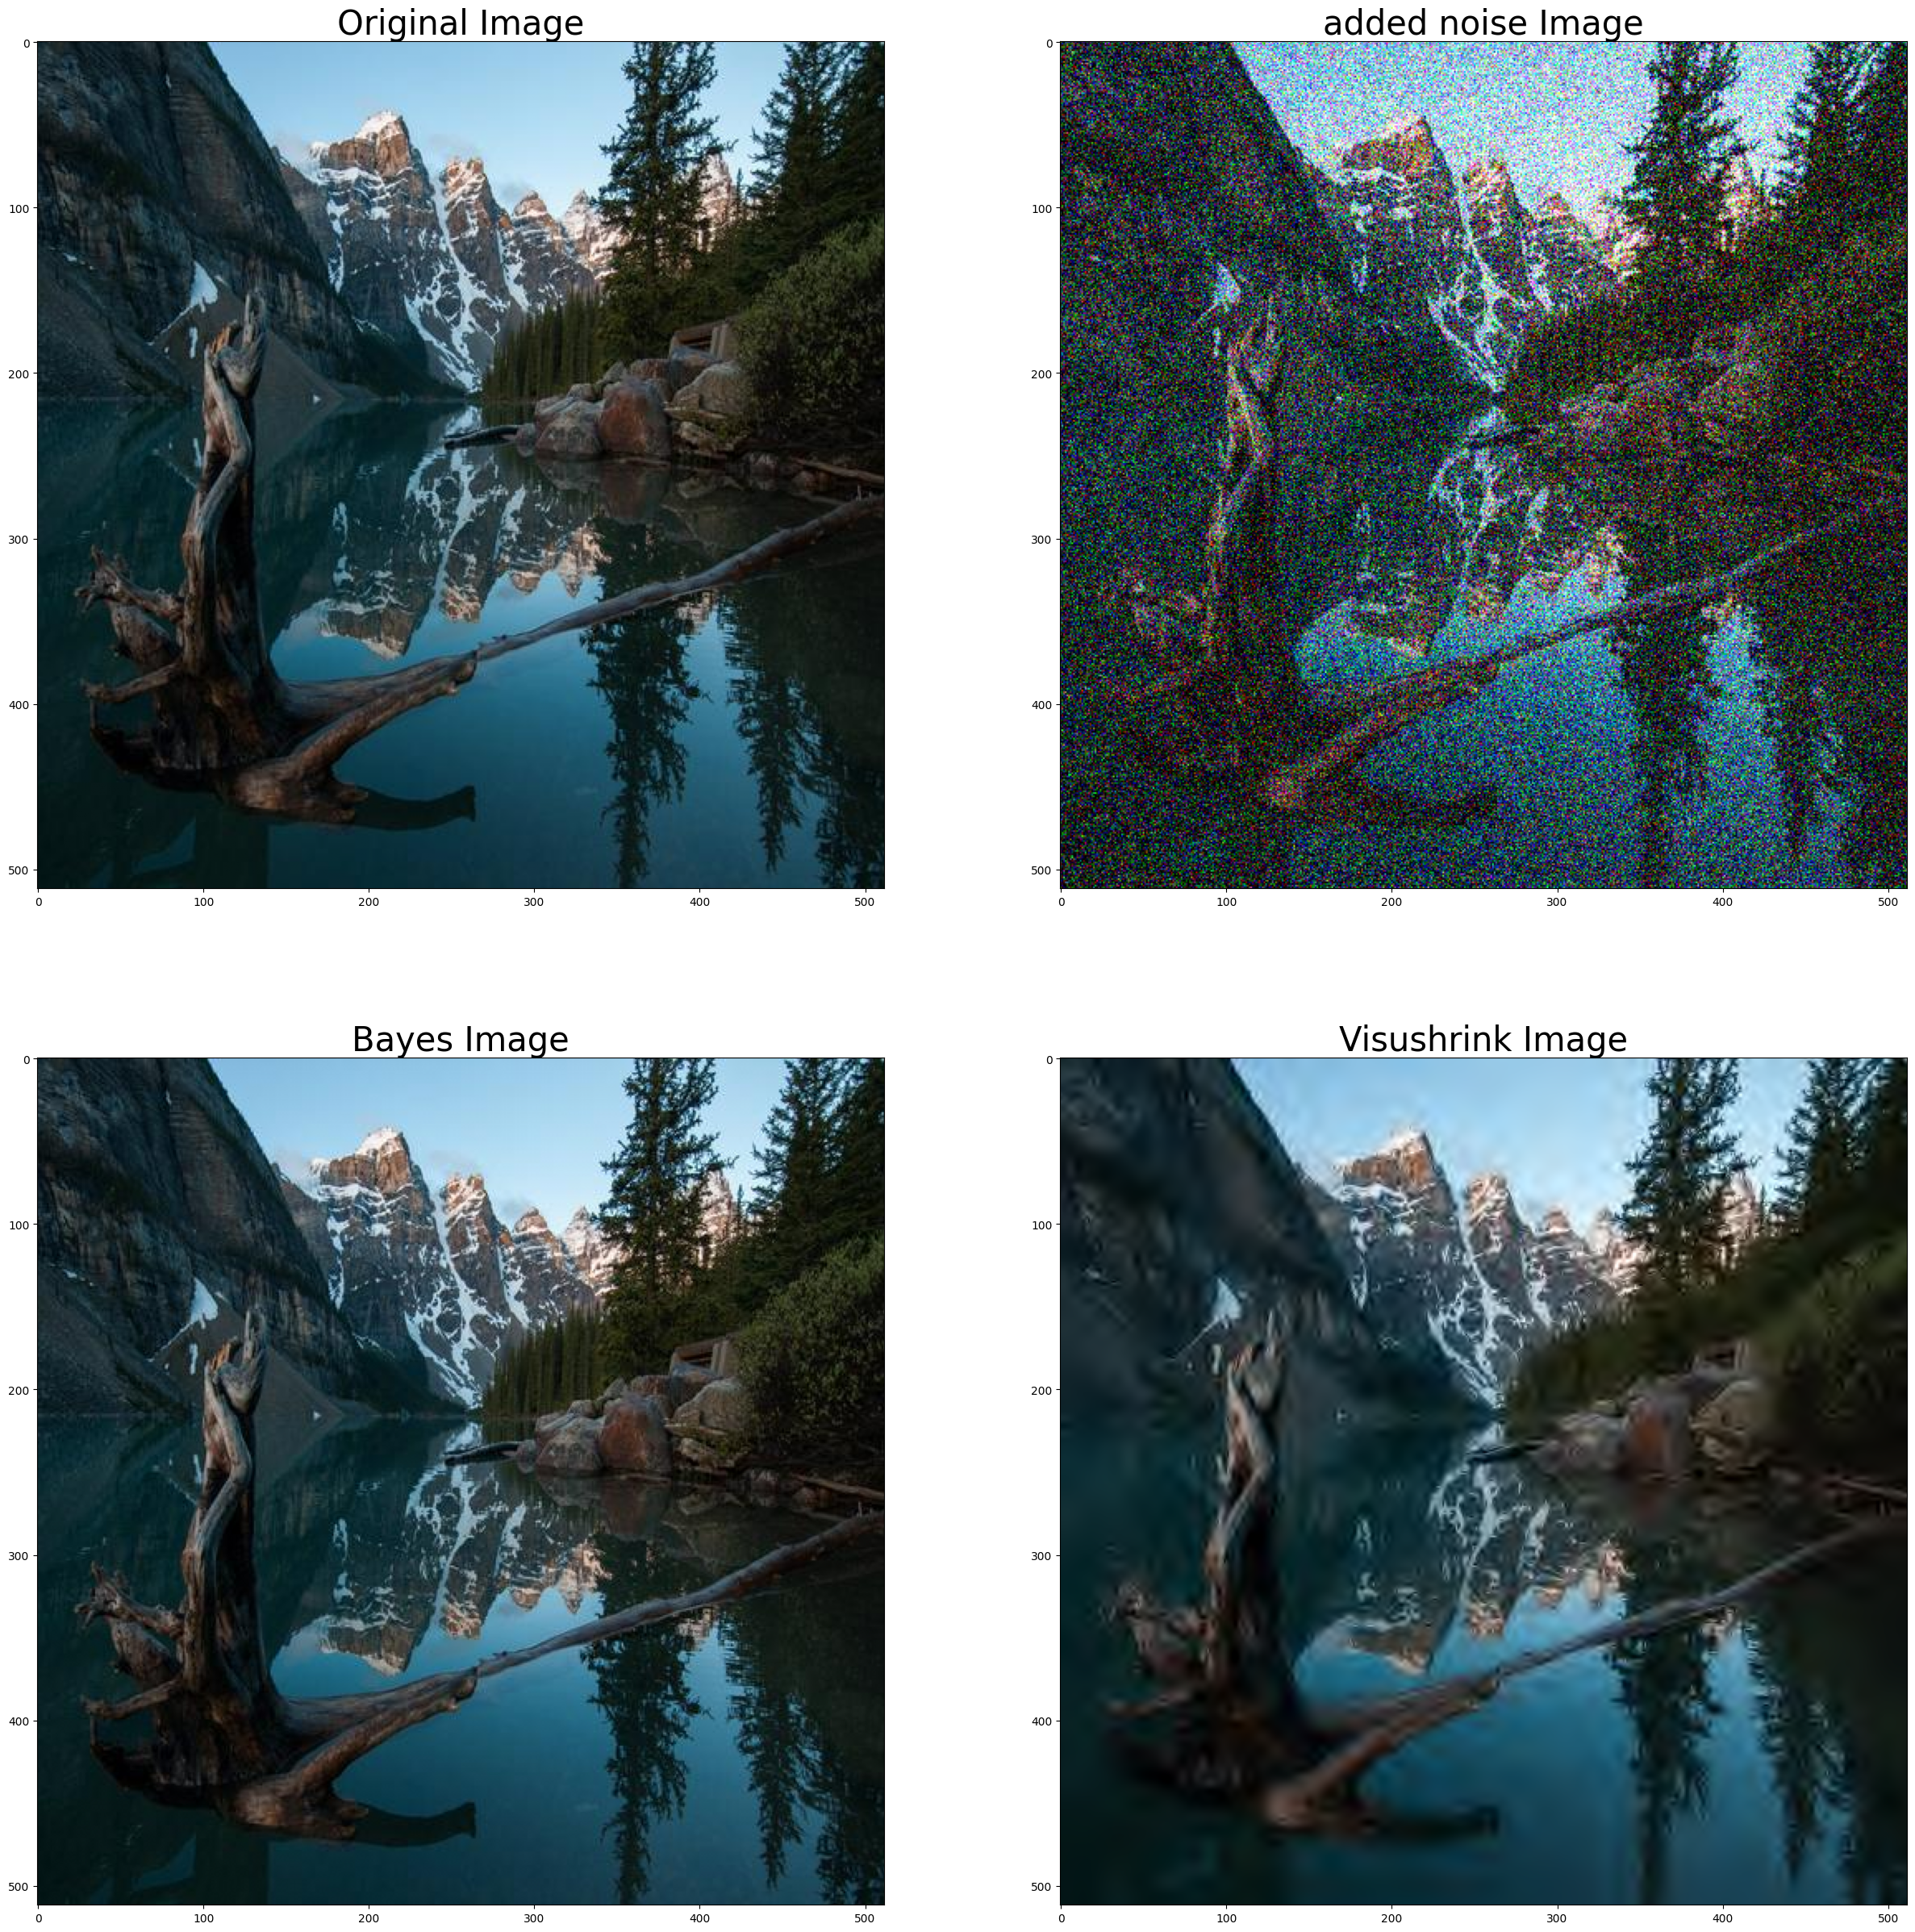

In [14]:
from PIL import Image
import numpy as np
psnr_noise_bayes = peak_signal_noise_ratio(img, img_bayes)
psnr_noise_rn = peak_signal_noise_ratio(img, imgn)
# psnr_noise_visu = peak_signal_noise_ratio(img_visushrink, img)

plt.figure(figsize=(30,30))

plt.subplot(2,2,1)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original Image', fontsize=30)

plt.subplot(2,2,2)
plt.imshow(imgn, cmap=plt.cm.gray)
plt.title('added noise Image', fontsize=30)

plt.subplot(2,2,3)
plt.imshow(img_bayes, cmap=plt.cm.gray)
plt.title('Bayes Image', fontsize=30)

plt.subplot(2,2,4)
plt.imshow(img_visushrink, cmap=plt.cm.gray)
plt.title('Visushrink Image', fontsize=30)

# plt.show()

imgn = skimage.img_as_ubyte(imgn)
# img_visushrink = skimage.img_as_ubyte(img_visushrink)
img_visushrink_uint8 = (img_visushrink * 255).astype(np.uint8)
img_visu_pil = Image.fromarray(img_visushrink_uint8)
img_visu_pil.save('img_visu.jpg')
skimage.io.imsave('imgn.jpg', imgn)
img_bay_unit = (img_bayes * 255).astype(np.uint8)
img_bay_pil = Image.fromarray(img_bay_unit)
img_bay_pil.save('img_bayes.jpg')

skimage.io.imsave('imgn.jpg', imgn)
# skimage.io.imsave('img_bayes.jpg', img_bayes)
# skimage.io.imsave('img_visushrink.jpg', img_visushrink)
print('PSNR bayes', psnr_noise_bayes)
# print('PSNR visu', psnr_noise_visu)



Time taken:  0.9544603824615479


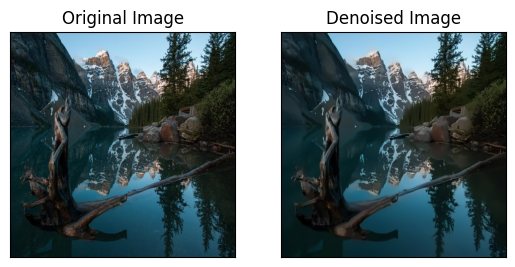

33.11617900717542


In [15]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import time

# Load the image
image = cv2.imread("log_resized.jpeg")
start_time = time.time()
# Apply non-local means denoising to the color image
denoised = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
end_time = time.time()
print("Time taken: ", end_time - start_time)
# Save the denoised image
cv2.imwrite("denoised_image.jpg", denoised)

with Image.open('denoised_image.jpg') as img:
  resized_img = img.resize((512, 512))
  resized_img.save('resized_result.jpg')
psnr_value = cv2.PSNR(image, denoised)

# Display the original and denoised images
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(denoised, cv2.COLOR_BGR2RGB)), plt.title('Denoised Image')
plt.xticks([]), plt.yticks([])
plt.show()
print(psnr_value)


In [8]:
!pip install lpips

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.5 MB/s eta 0:00:00


import lpips
import torch
from PIL import Image
import numpy as np
# Load your images
# image2 = Image.open("/content/og_inputs/result_23.jpg")
image2 = Image.open("/content/results/resized_result_17.jpg")
image2 = image2.resize((3000,4000))
image1 = Image.open("/content/noise_inputs/17_LL.jpg")
# image1.resize((3000,4000))
image1 = np.array(image1)
image2 = np.array(image2)
# Convert images to tensors
image1_tensor = lpips.im2tensor(image1).cuda()
image2_tensor = lpips.im2tensor(image2).cuda()

# Create a model (you can choose different versions, e.g., 'alex', 'vgg', 'squeeze', 'mobile')
loss_fn_alex = lpips.LPIPS(net='squeeze', version='0.1')
loss_fn_alex.cuda()  # Use GPU for faster computation if available

# Compute the LPIPS score
lpips_score = loss_fn_alex(image1_tensor, image2_tensor)

print(f"LPIPS Score: {lpips_score.item()}")


In [9]:
import lpips
import torch
from PIL import Image
import numpy as np
# Load your images
image2 = Image.open("100_LL.jpg")
image1 = Image.open("denoised_image.jpg")
image2 = image2.resize((3000,4000))
image1 = np.array(image1)
image2 = np.array(image2)
# Convert images to tensors
image1_tensor = lpips.im2tensor(image1).cuda()
image2_tensor = lpips.im2tensor(image2).cuda()

# Create a model (you can choose different versions, e.g., 'alex', 'vgg', 'squeeze', 'mobile')
loss_fn_alex = lpips.LPIPS(net='alex', version='0.1')
loss_fn_alex.cuda()  # Use GPU for faster computation if available

# Compute the LPIPS score
lpips_score = loss_fn_alex(image1_tensor, image2_tensor)

print(f"LPIPS Score: {lpips_score.item()}")


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:05<00:00, 41.5MB/s]


Loading model from: /usr/local/lib/python3.10/dist-packages/lpips/weights/v0.1/alex.pth
LPIPS Score: 0.5516976118087769
